In [ ]:
## 4_分類2(二値分類)
# 10.1 二値文類の性能指標
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y        = np.array([ 0,   1,   1,   0,   1,   0,    1,   0,   0,   1])
y_score = np.array([0.7, 0.8, 0.3, 0.4, 0.9, 0.6, 0.99, 0.1, 0.2, 0.5])



In [ ]:
y_ = np.array([1 if p >= 0.5 else 0 for p in y_score])
y_

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [ ]:
confusion_matrix(y_true=y, y_pred=y_)


array([[3, 2],
       [1, 4]])

In [ ]:
print(classification_report(y_true=y, y_pred=y_))


              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



In [1]:
import numpy as np
from sklearn.metrics import (roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, auc)

y        = np.array([ 0,   1,   1,   0,   1,   0,    1,   0,   0,   1])
y_score = np.array([0.7, 0.8, 0.3, 0.4, 0.9, 0.6, 0.99, 0.1, 0.2, 0.5])
y_ = np.array([1 if p <= 0.5 else 0 for p in y_score])

[
    sum((y == 0) & (y_ == 1)) / sum(y == 0), # FPR
    sum((y == 1) & (y_ == 1)) / sum(y == 1)  # TPR
]

[0.6, 0.4]

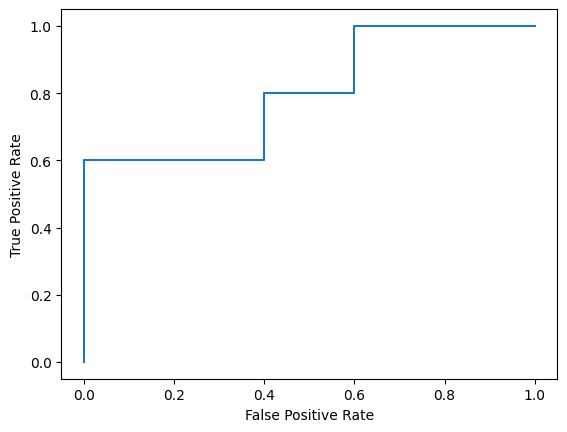

In [3]:
my_fpr, my_tpr, _ = roc_curve(
    y_true=y,
    y_score=y_score,
    pos_label=1
) # 1が陽性である
RocCurveDisplay(fpr=my_fpr, tpr=my_tpr).plot()

In [4]:
auc(x=my_fpr, y=my_tpr)

0.8

In [5]:
[
    sum((y == 1) & (y_ == 1)) / sum(y  == 1), # Recall=TPR
    sum((y == 1) & (y_ == 1)) / sum(y_ == 1)  # Precision
]

[0.4, 0.4]

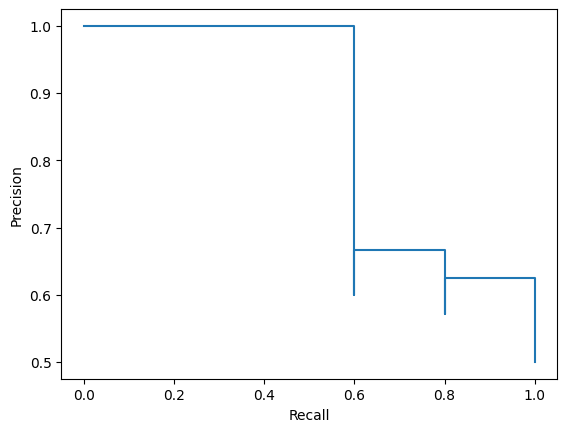

In [6]:
my_precision, my_recall, _ = precision_recall_curve(
    y_true=y,
    probas_pred=y_score,
    pos_label=1
) # 1が陽性である
PrecisionRecallDisplay(precision=my_precision, recall=my_recall).plot()

In [7]:
auc(x=my_recall, y=my_precision)

0.8463095238095237

In [2]:
# 10.3 ２値分類の実践
import graphviz
import pandas as pd
from sklearn import tree
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

my_url = (
    'https://raw.githubusercontent.com/taroyabuki'
    '/fromzero/master/data/titanic.csv'
)
my_data = pd.read_csv(my_url)

In [3]:
my_data.head()

,Class,Sex,Age,Survived
0,1st,Male,Child,Yes
1,1st,Male,Child,Yes
2,1st,Male,Child,Yes
3,1st,Male,Child,Yes
4,1st,Male,Child,Yes


In [6]:
X, y = my_data.iloc[:, 0:3], my_data.Survived

my_pipeline = Pipeline([
    ('ohe', OneHotEncoder(drop='first')),
    ('tree', tree.DecisionTreeClassifier(max_depth=2, random_state=0, min_impurity_decrease=0.01))
])

my_pipeline.fit(X, y)

Pipeline(steps=[('ohe', OneHotEncoder(drop='first')),
                ('tree',
                 DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.01,
                                        random_state=0))])

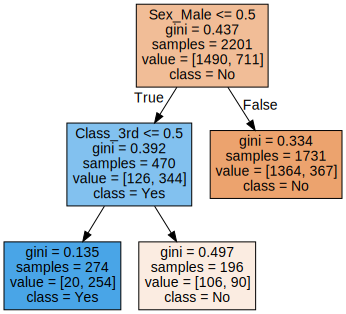

In [8]:
my_enc = my_pipeline.named_steps['ohe']
my_tree = my_pipeline.named_steps['tree']

my_dot = tree.export_graphviz(
    decision_tree=my_tree,
    out_file=None,
    feature_names=my_enc.get_feature_names_out(),
    class_names=my_pipeline.classes_,
    filled=True
)
graphviz.Source(my_dot)

In [9]:
my_scores=cross_val_score(
    my_pipeline, X, y,
    cv=LeaveOneOut(),
    n_jobs=-1
)
my_scores.mean()

0.7832803271240345

In [10]:
tmp = pd.DataFrame(
    my_pipeline.predict_proba(X),
    columns=my_pipeline.classes_
)
y_score = tmp.Yes

my_fpr, my_tpr, _ = roc_curve(
    y_true=y,
    y_score=y_score,
    pos_label='Yes'
)
my_auc = auc(x=my_fpr, y=my_tpr)
my_auc

0.7114886868858494

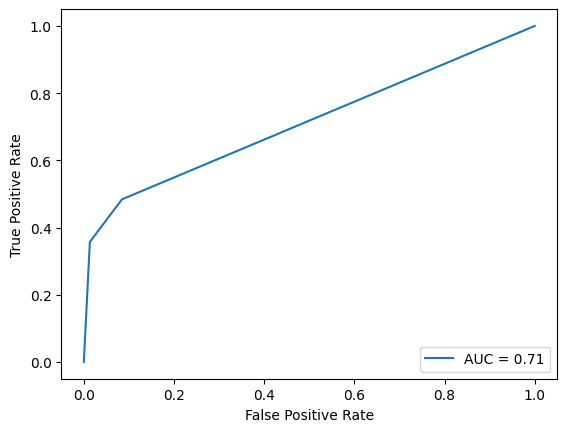

In [11]:
RocCurveDisplay(fpr=my_fpr, tpr=my_tpr, roc_auc=my_auc).plot()

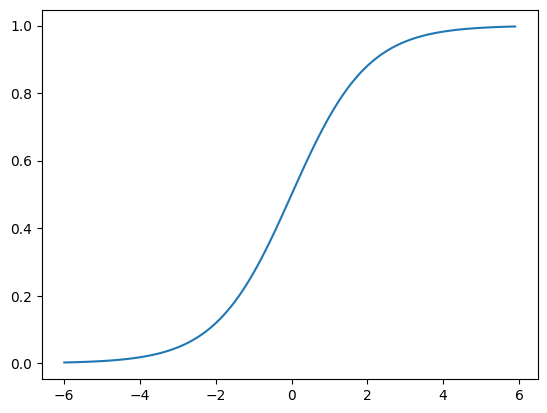

In [14]:
# 10.4 ロジスティック回帰
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6, 6, 0.1)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

my_url = (
    'https://raw.githubusercontent.com/taroyabuki'
    '/fromzero/master/data/titanic.csv'
)
my_data = pd.read_csv(my_url)

X, y = my_data.iloc[:, 0:3], my_data.Survived

my_pipeline = Pipeline([
    ('ohe', OneHotEncoder(drop='first')),
    ('lr', LogisticRegression(penalty='none'))
])
my_pipeline.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Pipeline(steps=[('ohe', OneHotEncoder(drop='first')),
                ('lr', LogisticRegression(penalty='none'))])

In [18]:
my_ohe = my_pipeline.named_steps.ohe
my_lr   = my_pipeline.named_steps.lr

my_lr.intercept_[0]

2.043878162056616

In [19]:
tmp = my_ohe.get_feature_names_out()
pd.Series(my_lr.coef_[0],
          index=tmp)

Class_2nd    -1.018069
Class_3rd    -1.777746
Class_Crew   -0.857708
Sex_Male     -2.420090
Age_Child     1.061531
dtype: float64

In [20]:
my_scores = cross_val_score(
    my_pipeline, X, y,
    cv=LeaveOneOut(),
    n_jobs=-1
)
my_scores.mean()

0.7782825988187188